In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load the UTM projected coordinates of universities and enterprises 
df_uni = pd.read_excel("university-wgs84.xlsx")    
df_comp = pd.read_excel("company-wgs84.xlsx")

In [3]:
# Extract x_utm and y_utm coordinates and remove missing values
uni_coords = df_uni[["lon_wgs84", "lat_wgs84"]].dropna().astype(float).values
comp_coords = df_comp[["lon_wgs84", "lat_wgs84"]].dropna().astype(float).values

In [4]:
# Read county-level boundary shapefile
shp_path = "D:/2025manchester/ERP/jiangsu/county.shp"   
gdf = gpd.read_file(shp_path)

In [5]:
# Extract x_utm and y_utm coordinates and remove missing values
uni_coords = df_uni[["lon_wgs84", "lat_wgs84"]].dropna().astype(float).values
comp_coords = df_comp[["lon_wgs84", "lat_wgs84"]].dropna().astype(float).values

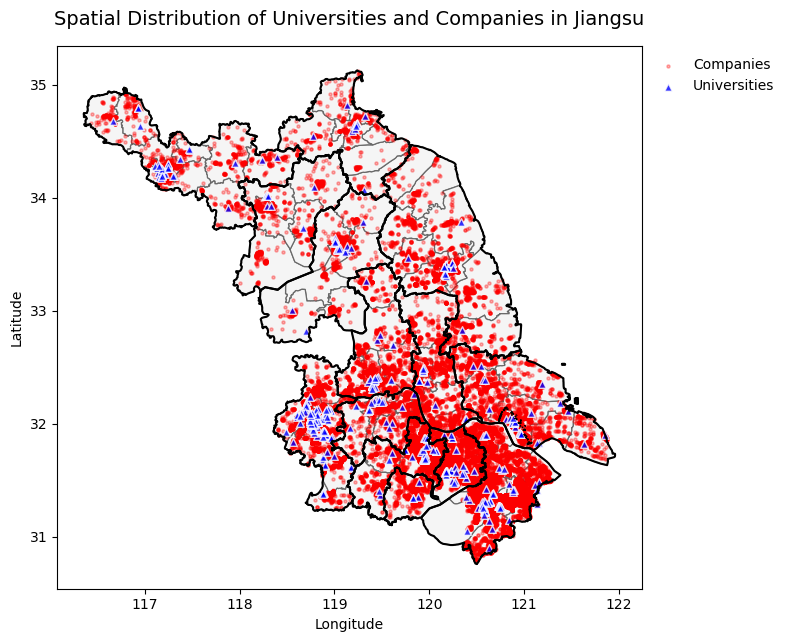

In [6]:
# Plot base map: county-level boundaries (dark gray, slightly thicker)
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, facecolor="whitesmoke", edgecolor="dimgray", linewidth=0.9)

# Dissolve into city-level boundaries (thicker black lines)
gdf_city = gdf.dissolve(by="地级")   # If the field name is "地级"
gdf_city.boundary.plot(ax=ax, edgecolor="black", linewidth=1.5)

# Company points: small red circles
ax.scatter(
    comp_coords[:, 0], comp_coords[:, 1],
    s=5, c="red", label="Companies", alpha=0.3
)

# University points: blue triangles
ax.scatter(
    uni_coords[:, 0], uni_coords[:, 1],
    s=30, c="blue", marker="^", label="Universities", alpha=0.8, edgecolor="white"
)

# Title and axis labels
ax.set_title("Spatial Distribution of Universities and Companies in Jiangsu", fontsize=14, pad=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Place legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

# Remove grid
ax.grid(False)

plt.tight_layout()

# Save figure (e.g., save as PNG)
plt.savefig("jiangsu_universities_companies.png", dpi=300, bbox_inches="tight")

plt.show()